In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

Importing and Understanding the DataSet

In [281]:
df = pd.read_csv("C:\\Users\\sarth\\Desktop\\Dataset\\Projects\\Project-2(Heart_Disease_Prediction)\\Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [282]:
df.shape

(270, 14)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [284]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [285]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [286]:
# Encoding Target variable(Heart disease) 
ohe = OneHotEncoder(sparse_output=False)
ohe_data = ohe.fit_transform(df[['Heart Disease']])
ohe_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(['Heart Disease']))

In [287]:
ohe_df.head()

,Heart Disease_Absence,Heart Disease_Presence
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [288]:
# Dropping one column to avoid dummy variable trap
ohe_df.drop(['Heart Disease_Absence'], axis=1, inplace=True)

In [289]:
ohe_df.head()

,Heart Disease_Presence
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


In [290]:
# Concatenating df and ohe_df to create final_df
final_df = pd.concat([df, ohe_df], axis=1)
final_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Heart Disease_Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1.0
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0.0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1.0
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0.0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0.0


In [291]:
final_df['Heart Disease_Presence'] = final_df['Heart Disease_Presence'].astype('int64')

In [292]:
# Dropping Heart Disease column as it will be of no use.
final_df.drop(['Heart Disease'], axis=1, inplace=True)
final_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease_Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


Exploratory Data Analysis(EDA)

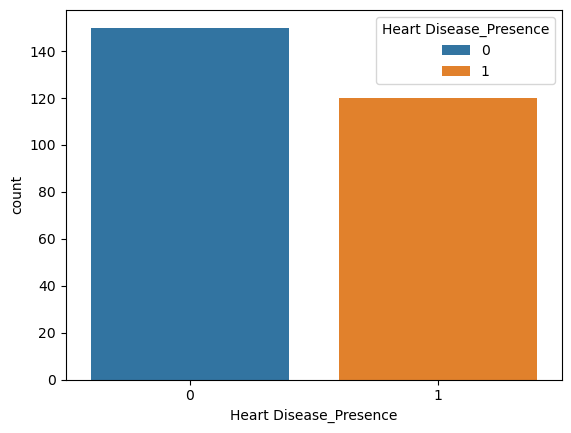

In [293]:
# Analyzing target variable
sns.countplot(final_df, x = 'Heart Disease_Presence', hue = 'Heart Disease_Presence');

Analysing other features with Target Variable

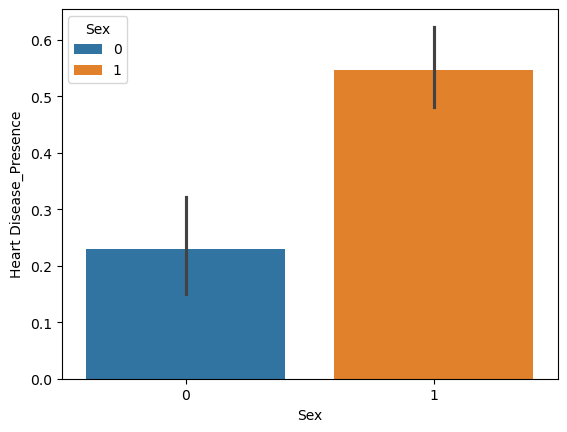

In [294]:
#  Sex Feaure v/s Target Variable
sns.barplot(final_df, x = 'Sex', y = 'Heart Disease_Presence', hue = 'Sex');

Observation(s)
1) Presence of Heart Disease is more in sex '1' than '0'

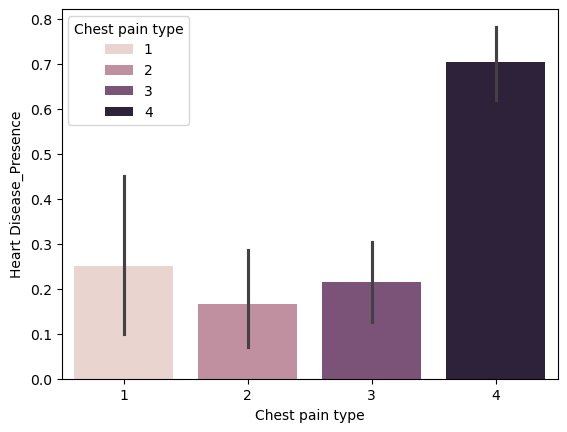

In [295]:
# Chest Pain Type v/s Target Variable
sns.barplot(final_df, x = 'Chest pain type', y = 'Heart Disease_Presence', hue = 'Chest pain type');

Observations
1) People with Chest_Pain_Type -> 2, are less likely to have a Heart Disease
2) People with Chest_Pain_Type -> 4, are more likely to have a Heart Disease

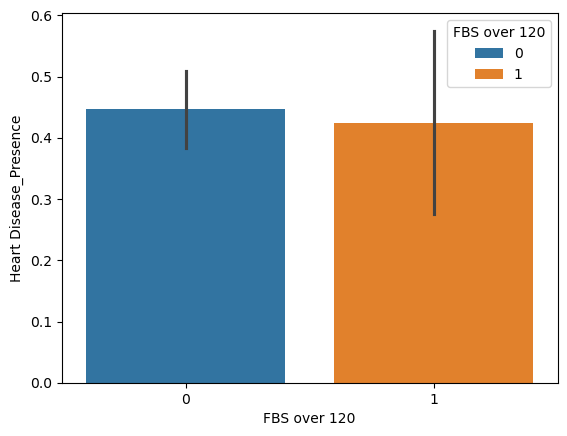

In [296]:
# FBS(Fasting Blood Sugar) over 120 v/s Target Variable
sns.barplot(final_df, x= 'FBS over 120', y = 'Heart Disease_Presence', hue='FBS over 120');

Observation:
1) Positive results of Heart Disease with FBS Level(>120) is slighty less as compared to FBS Level(<120), which is quite strange. 

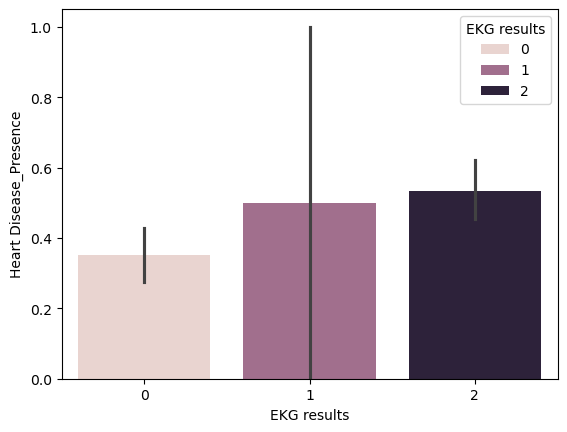

In [297]:
# EKG Results v/s Target Variables
sns.barplot(final_df, x = 'EKG results', y = 'Heart Disease_Presence', hue='EKG results');

Observation
1) People with EKG results 1 and 2 are more likely to have Heart Disease than EKG results = 0

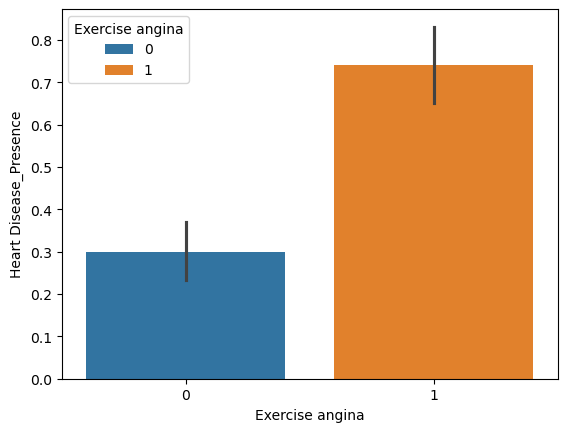

In [298]:
# Exercise Angina v/s Target Variables
sns.barplot(final_df, x = 'Exercise angina', y = 'Heart Disease_Presence', hue='Exercise angina');

Observation
1) People with exercise Angina = 1 are more likely to have Heart Disease

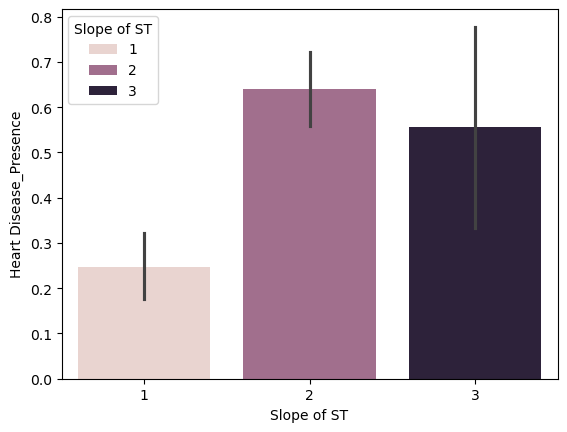

In [299]:
# Slope of ST v/s Target Variables
sns.barplot(final_df, x = 'Slope of ST', y = 'Heart Disease_Presence', hue='Slope of ST');

Observation
1) People with their slope of ST = 1 are less likely to have Heart Disease

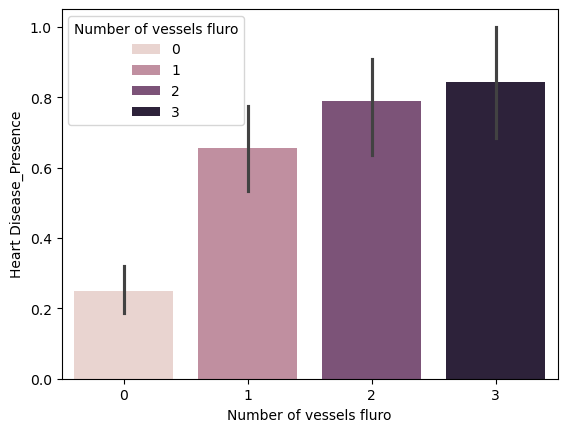

In [300]:
# Number of vessels fluro v/s Target Variables
sns.barplot(final_df, x = 'Number of vessels fluro', y = 'Heart Disease_Presence', hue='Number of vessels fluro');

Observation
1) People with Number of vessels fluro = 0, are very less likely to suffer from Heart Disease 

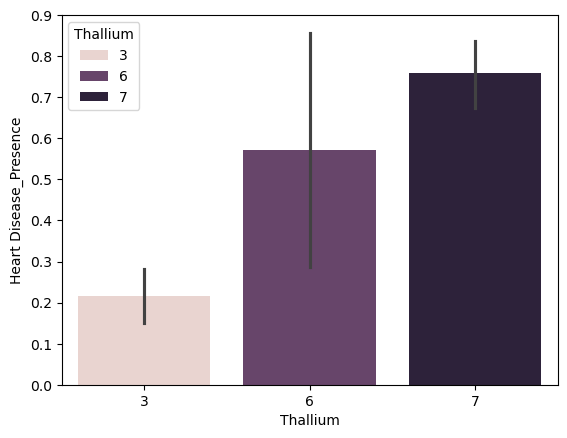

In [301]:
# Thallium v/s Target Variables
sns.barplot(final_df, x = 'Thallium', y = 'Heart Disease_Presence', hue='Thallium');

Observations
1) People with thallium = 3, are least likely to have Heart Disease
2) People with thallium = 7, are vary much likely to have a Heart Disease

Train and Test Splitting

In [302]:
X = final_df.drop(['Heart Disease_Presence'], axis=1)
y = final_df['Heart Disease_Presence']

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [304]:
X_train.shape

(216, 13)

In [305]:
X_test.shape

(54, 13)

In [306]:
y_train.shape

(216,)

In [307]:
y_test.shape

(54,)

MODEL BUILDING

1) Logistic Regression

In [308]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [309]:
y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(y_pred_lr, y_test)*100, 2)

In [310]:
print("The Accuracy Score of Logistic Regression Model is : ", score_lr, '%')

The Accuracy Score of Logistic Regression Model is :  79.63 %


2. Naive Bayes

In [311]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [312]:
y_pred_nb = nb.predict(X_test)
score_nb = round(accuracy_score(y_pred_nb, y_test), 2)*100

In [313]:
print("The Accuracy Score of Naive Bayes Model is : ", score_nb, '%')

The Accuracy Score of Naive Bayes Model is :  81.0 %


3. Support Vector Classifier

In [314]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [315]:
y_pred_svc = svc.predict(X_test)
score_svc = round(accuracy_score(y_pred_svc, y_test), 2)*100

In [316]:
print("The Accuracy Score of Support Vector Classifier Model is : ", score_svc, '%')

The Accuracy Score of Support Vector Classifier Model is :  56.00000000000001 %


4. K-Nearest Neighbours

In [317]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [318]:
y_pred_knn = knn.predict(X_test)
score_knn = round(accuracy_score(y_pred_knn, y_test), 2)*100

In [319]:
print("The Accuracy Score of K-Nearest Neighbour Model is : ", score_knn, '%')

The Accuracy Score of K-Nearest Neighbour Model is :  56.99999999999999 %


5. Decision Tree

In [320]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [321]:
y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(y_pred_dt, y_test), 2)*100

In [322]:
print("The Accuracy Score of Decisin Tree Classifier Model is : ", score_dt, '%')

The Accuracy Score of Decisin Tree Classifier Model is :  76.0 %


6. Random Forest Classifier 

In [323]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [324]:
y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(y_pred_rf, y_test), 2)*100

In [325]:
print("The Accuracy Score of Random Forest Classifier Model is : ", score_rf,'%')

The Accuracy Score of Random Forest Classifier Model is :  80.0 %


7. XGBoost Classifier

In [328]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [329]:
y_pred_xgb = xgb.predict(X_test)
score_xgb = round(accuracy_score(y_pred_xgb, y_test), 2)*100

In [330]:
print("The Accuracy Score of Random Forest Classifier Model is : ", score_xgb,'%')

The Accuracy Score of Random Forest Classifier Model is :  78.0 %


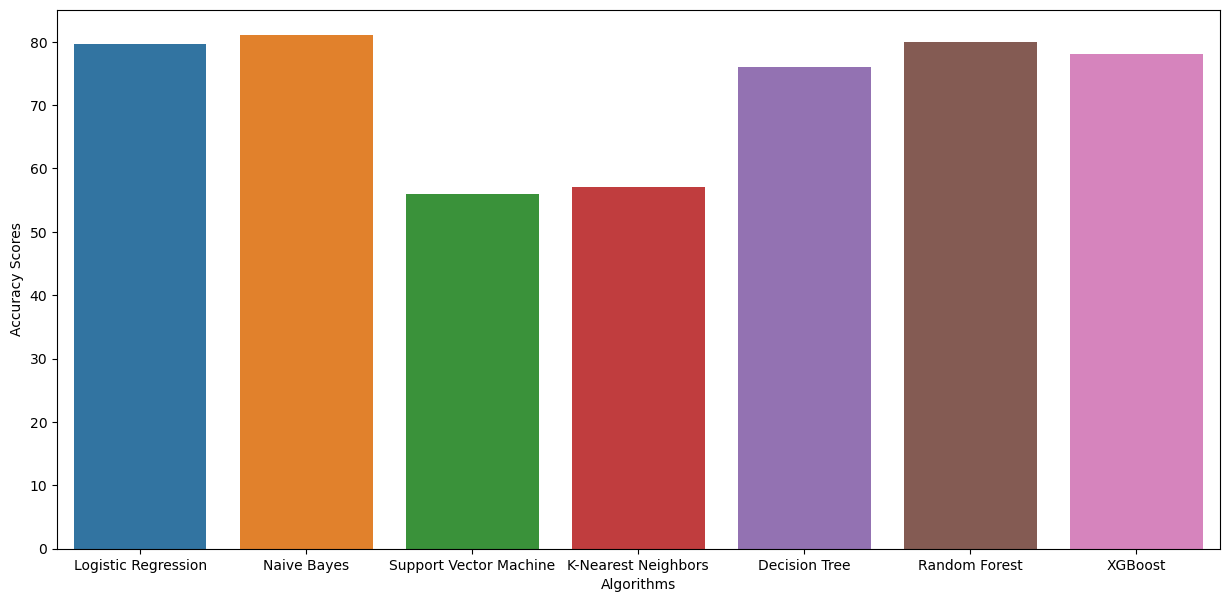

In [342]:
scores = [score_lr, score_nb, score_svc, score_knn, score_dt, score_rf, score_xgb]
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost"]
plt.figure(figsize=(15, 7))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Scores")
sns.barplot(x = algorithms, y = scores, hue=algorithms);

Observation
1. Naive Bayes, Logistic Regression and Random Forest models are three models with great accuracy scores.
2. Support Vector Machine adn K-Nearest Neighbours model works badly on the dataset.